# Import file

In [11]:
import requests
import json
import pandas as pd
import matplotlib as plt
import json
from bs4 import BeautifulSoup

import yaml
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
with open('secrets.yaml') as f:
    s = yaml.load(f, Loader=Loader)

# Checking Api connection

In [12]:
url = 'https://api.jikan.moe/v4/seasons/2023/spring'
response  = requests.get(url)
response.status_code
answer = response.json()['data']
animedf = pd.DataFrame(answer)
animedf.head(1)

,mal_id,url,images,trailer,approved,titles,title,title_english,title_japanese,title_synonyms,...,season,year,broadcast,producers,licensors,studios,genres,explicit_genres,themes,demographics
0,51019,https://myanimelist.net/anime/51019/Kimetsu_no...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'a9tq0aS5Zu8', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Kimetsu no Yaib...",Kimetsu no Yaiba: Katanakaji no Sato-hen,Demon Slayer: Kimetsu no Yaiba Swordsmith Vill...,鬼滅の刃 刀鍛冶の里編,[],...,spring,2023,"{'day': 'Sundays', 'time': '23:15', 'timezone'...","[{'mal_id': 17, 'type': 'anime', 'name': 'Anip...","[{'mal_id': 493, 'type': 'anime', 'name': 'Ani...","[{'mal_id': 43, 'type': 'anime', 'name': 'ufot...","[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...",[],"[{'mal_id': 13, 'type': 'anime', 'name': 'Hist...","[{'mal_id': 27, 'type': 'anime', 'name': 'Shou..."


# Testing graphing for genres in the spring 2023 season using genres column

<AxesSubplot:>

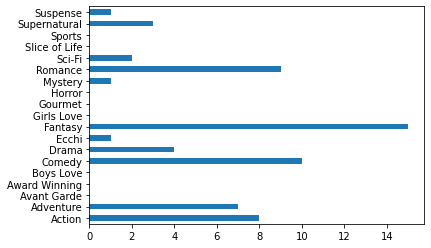

In [13]:
biglist = []
genreList = ["Action", "Adventure", "Avant Garde", "Award Winning", "Boys Love", "Comedy", "Drama", 'Ecchi', "Fantasy", "Girls Love", "Gourmet", "Horror",
 "Mystery", "Romance", "Sci-Fi", "Slice of Life", "Sports", "Supernatural", "Suspense"]
genreDict = {}
for i in genreList:
    genreDict[i] = 0
genreDict
for i in animedf['genres']:
    tlist = []
    for j in range(len(i)):
        tlist.append(i[j]['name'])
    biglist.append(tlist)
biglist
for i in biglist:
    for j in i:
        genreDict[j] += 1
genreDict
genreSer = pd.Series(genreDict)
genreSer.plot.barh()
        

# Columns for each genre

In [14]:
genreList = ['Action', "Adventure", "Avant Garde", "Award Winning", "Boys Love", "Comedy", "Drama", 'Ecchi', "Fantasy", "Girls Love", "Gourmet", "Horror",
 "Mystery", "Romance", "Sci-Fi", "Slice of Life", "Sports", "Supernatural", "Suspense"]

for g in genreList: #all genres listed
    colDict = {}
    for i in range(len(animedf.genres)):
        colDict[i] = 0
    count = 0
    for i in range(len(animedf.genres)): #25
        for j in animedf.genres[i]: #loops through each genre
            if colDict[i] == 0:
                colDict[i] = True if j['name'] == g else False
    colSer = pd.Series(colDict)
    animedf[g] = colSer

animedf.head()

,mal_id,url,images,trailer,approved,titles,title,title_english,title_japanese,title_synonyms,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,51019,https://myanimelist.net/anime/51019/Kimetsu_no...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'a9tq0aS5Zu8', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Kimetsu no Yaib...",Kimetsu no Yaiba: Katanakaji no Sato-hen,Demon Slayer: Kimetsu no Yaiba Swordsmith Vill...,鬼滅の刃 刀鍛冶の里編,[],...,False,False,False,False,False,False,False,False,False,False
1,52034,https://myanimelist.net/anime/52034/Oshi_no_Ko,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': '1yXa8MAmocQ', 'url': 'https://...",True,"[{'type': 'Default', 'title': '""Oshi no Ko""'},...","""Oshi no Ko""",[Oshi No Ko],【推しの子】,[My Star],...,False,False,False,False,False,False,False,False,True,False
2,46569,https://myanimelist.net/anime/46569/Jigokuraku,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': '1JLeeulO8AU', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Jigokuraku'}, {...",Jigokuraku,Hell's Paradise,地獄楽,"[Paradition, Heavenhell]",...,False,False,False,False,False,False,False,False,False,False
3,48549,https://myanimelist.net/anime/48549/Dr_Stone__...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'bITRcLr4xR8', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Dr. Stone: New ...",Dr. Stone: New World,None,Dr.STONE NEW WORLD,[Dr. Stone 3rd Season],...,False,False,False,False,False,True,False,False,False,False
4,52211,https://myanimelist.net/anime/52211/Mashle,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'Hbz4shbCPCA', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Mashle'}, {'typ...",Mashle,Mashle: Magic and Muscles,マッシュル-MASHLE-,[],...,False,False,False,False,False,False,False,False,False,False


# Setting up connection to reddit api

In [15]:
# This code is from: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c

# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth(s['client_id'], s['secret_token'])

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': s['username'],
        'password': s['password']}
# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'INST447FinalProject'}
# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)
# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']
# add authorization to our headers dictionary
# What do the ** mean? See: https://stackoverflow.com/questions/2921847/what-do-double-star-asterisk-and-star-asterisk-mean-in-a-function-call
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}
# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)


<Response [200]>

# Connecting to r/anime

In [16]:

res = requests.get('https://oauth.reddit.com/r/anime/new', headers = headers, params = {'limit': 100})
resjson = res.json()
resjson

{'kind': 'Listing',
 'data': {'after': 't3_13a222b',
  'dist': 100,
  'modhash': None,
  'geo_filter': '',
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'anime',
     'selftext': "i want to watch/read more bl(or gl) similar to Heavens Official Blessing. I've looked into Mo Dao Zu Shi and found the donghua is not bl enough for me, but the manhua is too bl. any recommendations? ideally, it wouldn't be too long, and i CERTINLY don't want any smex stuff. romance is chill, but not anything more than that. please help&lt;3",
     'author_fullname': 't2_oshm91ym',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'any recommendations for bl/gl?',
     'link_flair_richtext': [{'e': 'text', 't': 'What to Watch?'}],
     'subreddit_name_prefixed': 'r/anime',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': 'recommendation',
     'downs': 0,
     'thumbnail_height': None,
     'top_a

# Checking common keywords

In [17]:
#checks for the reddit common keys in all posts
count = 1
colList = []
for i in resjson['data']['children']:
    for j in i['data'].keys():
        if count % 10 == 0:
            if j in colList:
                continue
            else:
                colList.append(j)
                print(j)
        else:
            if j in colList:
                continue
            else:
                colList.append(j)
                print(j, end = " ")
        count += 1



approved_at_utc subreddit selftext author_fullname saved mod_reason_title gilded clicked title link_flair_richtext
subreddit_name_prefixed hidden pwls link_flair_css_class downs thumbnail_height top_awarded_type hide_score name quarantine
link_flair_text_color upvote_ratio author_flair_background_color subreddit_type ups total_awards_received media_embed thumbnail_width author_flair_template_id is_original_content
user_reports secure_media is_reddit_media_domain is_meta category secure_media_embed link_flair_text can_mod_post score approved_by
is_created_from_ads_ui author_premium thumbnail edited author_flair_css_class author_flair_richtext gildings content_categories is_self mod_note
created link_flair_type wls removed_by_category banned_by author_flair_type domain allow_live_comments selftext_html likes
suggested_sort banned_at_utc view_count archived no_follow is_crosspostable pinned over_18 all_awardings awarders
media_only link_flair_template_id can_gild spoiler locked author_fla

# Reddit dataframe

In [18]:
redditdf = pd.DataFrame()

for post in resjson['data']['children']:
    redditdf = redditdf.append({
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'num_comments': post['data']['num_comments'],
            'created': post['data']['created']
        }, ignore_index=True
    )
redditdf

C:\Users\Jun\AppData\Local\Temp\ipykernel_38716\1800812257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  redditdf = redditdf.append({
C:\Users\Jun\AppData\Local\Temp\ipykernel_38716\1800812257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  redditdf = redditdf.append({
C:\Users\Jun\AppData\Local\Temp\ipykernel_38716\1800812257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  redditdf = redditdf.append({
C:\Users\Jun\AppData\Local\Temp\ipykernel_38716\1800812257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  redditdf = redditdf.append({
C:\Users\Jun\AppData\Local\Temp\ipykernel_38716\1800812257.py:4: FutureWarning: The 

,title,selftext,ups,downs,score,upvote_ratio,num_comments,created
0,any recommendations for bl/gl?,i want to watch/read more bl(or gl) similar to...,1,0,1,1.00,1,1.683489e+09
1,Ao no Orchestra • Blue Orchestra - Episode 5 d...,"*Ao no Orchestra*, episode 5\n\n\n\n# [Rate th...",11,0,11,1.00,5,1.683487e+09
2,Good evening fellows ! Help me with my request .,I've watched Interspecies Reviewers recently a...,0,0,0,0.29,2,1.683486e+09
3,[Rewatch] Yu-Gi-Oh! 5ds Rewatch - Week 6: Epis...,"#Episode 32: The Symbol of Freedom, The Daedal...",7,0,7,1.00,47,1.683486e+09
4,What Have You Watched This Past Week That is N...,Title says it all - talk about the anime you w...,10,0,10,1.00,21,1.683486e+09
...,...,...,...,...,...,...,...,...
95,Gun x Sword Rewatch - Official Announcement + ...,#[*CHESTO!*](https://files.catbox.moe/0bs307.w...,30,0,30,0.88,17,1.683414e+09
96,The Scariest Horror Anime Ever? | Umezu Kazuo ...,,7,0,7,0.63,2,1.683413e+09
97,『Kimi wa Houkago Insomnia』Episode 5 WEB Preview,,47,0,47,0.86,0,1.683411e+09
98,"Anime connoisseurs, I need your assistance","Ok, so I’ve watched MHA, Naruto, Promised Neve...",0,0,0,0.23,22,1.683409e+09


# Merging everything

In [19]:
y = input("What year?")
s = input("What season? winter/spring/summer/fall")
testurl = f'https://api.jikan.moe/v4/seasons/{y}/{s}'
response4 = requests.get(testurl)
answer4 = response4.json()['data']
animedf4 = pd.DataFrame(answer4)
animedf4 = animedf4.drop(columns = ['images', 'url', 'trailer', 'airing', 'approved', 'titles', 'title_english', 'title_japanese', 'broadcast', 'title_synonyms', 'status', 'type', 'aired', 'synopsis',
       'background', 'explicit_genres', 'themes', 'demographics', 'season', 'year'])

genreList = ['Action', "Adventure", "Avant Garde", "Award Winning", "Boys Love", "Comedy", "Drama", 'Ecchi', "Fantasy", "Girls Love", "Gourmet", "Horror",
 "Mystery", "Romance", "Sci-Fi", "Slice of Life", "Sports", "Supernatural", "Suspense"]

for g in genreList: #all genres listed
    colDict = {}
    for i in range(len(animedf4.genres)):
        colDict[i] = 0
    count = 0
    for i in range(len(animedf4.genres)): #25
        for j in animedf4.genres[i]: #loops through each genre
            if colDict[i] == 0:
                colDict[i] = True if j['name'] == g else False
    colSer = pd.Series(colDict)
    animedf4[g] = colSer

animedf4.head()

,mal_id,title,source,episodes,duration,rating,score,scored_by,rank,popularity,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,38408,Boku no Hero Academia 4th Season,Manga,25,24 min per ep,PG-13 - Teens 13 or older,7.91,1011051,709,53,...,False,False,False,False,False,False,False,False,False,False
1,39195,Beastars,Manga,12,22 min per ep,R - 17+ (violence & profanity),7.84,500557,842,204,...,False,False,False,False,False,False,True,False,False,False
2,39597,Sword Art Online: Alicization - War of Underworld,Light novel,12,23 min per ep,R - 17+ (violence & profanity),7.58,422027,1428,252,...,False,False,False,False,False,False,False,False,False,False
3,39701,Nanatsu no Taizai: Kamigami no Gekirin,Manga,24,24 min per ep,PG-13 - Teens 13 or older,6.46,391626,6625,269,...,False,False,False,False,False,False,False,False,False,False
4,39940,Shokugeki no Souma: Shin no Sara,Manga,12,24 min per ep,PG-13 - Teens 13 or older,7.75,335233,1023,340,...,False,True,False,False,False,False,False,False,False,False


<AxesSubplot:>

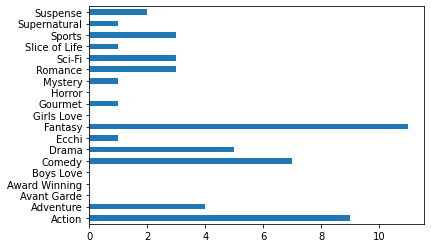

In [20]:
#creates a barplot for each genre
biglist = []
genreList = ["Action", "Adventure", "Avant Garde", "Award Winning", "Boys Love", "Comedy", "Drama", 'Ecchi', "Fantasy", "Girls Love", "Gourmet", "Horror",
 "Mystery", "Romance", "Sci-Fi", "Slice of Life", "Sports", "Supernatural", "Suspense"]
genreDict = {}
for i in genreList:
    genreDict[i] = 0
genreDict
for i in animedf4['genres']:
    tlist = []
    for j in range(len(i)):
        tlist.append(i[j]['name'])
    biglist.append(tlist)
biglist
for i in biglist:
    for j in i:
        genreDict[j] += 1
genreDict
genreSer = pd.Series(genreDict)
genreSer.plot.barh()

<AxesSubplot:>

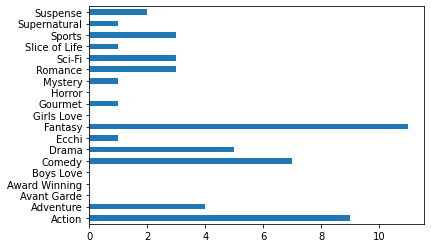

In [21]:
barDict = {}
for poss in genreList:
    barDict[poss] = animedf4[poss].value_counts()
    if True in barDict[poss].index:
        barDict[poss] = barDict[poss][True]
    else:
        barDict[poss] = 0
genreSer = pd.Series(barDict)
genreSer.plot.barh()


In [22]:
for i in animedf4['producers']:
    print(i)

[{'mal_id': 53, 'type': 'anime', 'name': 'Dentsu', 'url': 'https://myanimelist.net/anime/producer/53/Dentsu'}, {'mal_id': 76, 'type': 'anime', 'name': 'Yomiuri Telecasting', 'url': 'https://myanimelist.net/anime/producer/76/Yomiuri_Telecasting'}, {'mal_id': 166, 'type': 'anime', 'name': 'Movic', 'url': 'https://myanimelist.net/anime/producer/166/Movic'}, {'mal_id': 757, 'type': 'anime', 'name': 'Sony Music Entertainment', 'url': 'https://myanimelist.net/anime/producer/757/Sony_Music_Entertainment'}, {'mal_id': 1143, 'type': 'anime', 'name': 'TOHO animation', 'url': 'https://myanimelist.net/anime/producer/1143/TOHO_animation'}, {'mal_id': 1365, 'type': 'anime', 'name': 'Shueisha', 'url': 'https://myanimelist.net/anime/producer/1365/Shueisha'}]
[{'mal_id': 166, 'type': 'anime', 'name': 'Movic', 'url': 'https://myanimelist.net/anime/producer/166/Movic'}, {'mal_id': 169, 'type': 'anime', 'name': 'Fuji TV', 'url': 'https://myanimelist.net/anime/producer/169/Fuji_TV'}, {'mal_id': 230, 'type'